# Capstone: Exploratory Data Analysis

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# import project utils
import sys
sys.path.append('../src')

import graph_utils

## The Data: San Francisco Police Department Incident Reports

## Read the data

The dataset is available as two CSV files with historical data from 2003-2018 and 2018-Present:

* [San Franciso Police Department Incident Reports: Historical 2003 to May 2018](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry/about_data)
* [Police Department Incident Reports: 2018 to Present](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783/about_data)

The current data is updated nightly and it takes a few minutes to read and convert the data to a time-series format. So, I've created a set of utilities to optimize data ingestion in the `data_utils.py`.

In [6]:
import data_utils

I periodically refresh the dataset from the [excellent DataSF site](https://www.sf.gov/departments/city-administrator/datasf) to the project `data` directoty, and generate a _clean_ input file transformed as a time-series. I will typically do this a couple of times a week, and save the output as a static comment below so I know what happened.

**Capstone Project 20.1: Initial Report and Exploratory Data Analysis (EDA)**: I'm limiting the report to only the current data for now:

* [Police Department Incident Reports: 2018 to Present](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783/about_data)


In [8]:
# Convert the raw SFPD data into a cleansed data file - only to be used when refreshing from new data

current_raw_file = '../data/Police_Department_Incident_Reports__2018_to_Present_20240910.csv'
current_clean_file = '../data/incidents_clean.csv'

# Uncomment to regenerate the clean data file from raw data - normally just read the clean data as it's MUCH FASTER
# data_utils.generate_clean_csv(current_raw_file, current_clean_file, debug=True)

STATIC COMMENT: OUTPUT SAVED FROM LAST SUCCESSFULL RUN (see timestamp below):
```
Start Time: 09/13/24 16:24:59

Reading file: ../data/Police_Department_Incident_Reports__2018_to_Present_20240910.csv ... Done: 887,173 rows, 35 columns
... Formatting column names ... Done
... Creating timeseries columns: datetime and date ... 
...... Number of rows where the datetime conversion failed: 0
...... Number of rows where the date conversion failed: 0
...... Timespan: 2018-01-01 00:00:00 - 2024-09-08 19:30:00
... Done
... Setting index to datetime ... Done

Current Time: 09/13/24 16:26:17

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 887173 entries, 2023-03-13 23:41:00 to 2023-03-21 17:42:00
Data columns (total 36 columns):
 #   Column                                                Non-Null Count   Dtype         
---  ------                                                --------------   -----         
 0   incident_datetime                                     887173 non-null  object        
 1   incident_date                                         887173 non-null  object        
 2   incident_time                                         887173 non-null  object        
 3   incident_year                                         887173 non-null  int64         
 4   incident_day_of_week                                  887173 non-null  object        
 5   report_datetime                                       887173 non-null  object        
 6   row_id                                                887173 non-null  int64         
 7   incident_id                                           887173 non-null  int64         
 8   incident_number                                       887173 non-null  int64         
 9   cad_number                                            689019 non-null  float64       
 10  report_type_code                                      887173 non-null  object        
 11  report_type_description                               887173 non-null  object        
 12  filed_online                                          175483 non-null  object        
 13  incident_code                                         887173 non-null  int64         
 14  incident_category                                     886295 non-null  object        
 15  incident_subcategory                                  886295 non-null  object        
 16  incident_description                                  887173 non-null  object        
 17  resolution                                            887173 non-null  object        
 18  intersection                                          838341 non-null  object        
 19  cnn                                                   838341 non-null  float64       
 20  police_district                                       887173 non-null  object        
 21  analysis_neighborhood                                 838173 non-null  object        
 22  supervisor_district                                   837885 non-null  float64       
 23  supervisor_district_2012                              838198 non-null  float64       
 24  latitude                                              838341 non-null  float64       
 25  longitude                                             838341 non-null  float64       
 26  point                                                 838341 non-null  object        
 27  neighborhoods                                         821671 non-null  float64       
 28  esncag_-_boundary_file                                9413 non-null    float64       
 29  central_market/tenderloin_boundary_polygon_-_updated  117048 non-null  float64       
 30  civic_center_harm_reduction_project_boundary          114781 non-null  float64       
 31  hsoc_zones_as_of_2018-06-05                           185157 non-null  float64       
 32  invest_in_neighborhoods_(iin)_areas                   0 non-null       float64       
 33  current_supervisor_districts                          838198 non-null  float64       
 34  current_police_districts                              837437 non-null  float64       
 35  date                                                  887173 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(14), int64(5), object(16)
memory usage: 250.4+ MB
... Writing file: ../data/incidents_clean.csv (887173, 36) ... Done
Done

End Time: 09/13/24 16:26:40
```

As you can see, there are almost a million samples since 2018!

So, I then generate a few randomly sampled datasets of known percentages, to speed up the data exploration. Again only done when refreshing the dataset. Since we'll be working across multiple randomly selected datafiles, I set a global random_state value from hereon remove any randomization artifacts from one run to the next:

In [11]:
# Global settings
project_random_state = 42   # Consistent random_state

In [12]:
# Uncomment to generate the sample files

# data_utils.generate_sample_files(current_clean_file, random_state=project_random_state)

STATIC COMMENT: OUTPUT SAVED FROM LAST SUCCESSFULL RUN (see timestamp below):
```
Start Time: 09/13/24 16:26:40

Reading file: ../data/incidents_clean.csv ... Done: 887,173 rows, 37 columns
... Writing 10% sample file: ../data/incidents_clean_10_pct.csv (88717, 37) ... Done
... Writing 25% sample file: ../data/incidents_clean_25_pct.csv (221793, 37) ... Done
... Writing 50% sample file: ../data/incidents_clean_50_pct.csv (443586, 37) ... Done
... Writing 75% sample file: ../data/incidents_clean_75_pct.csv (665380, 37) ... Done
End Time: 09/13/24 16:28:05
```

In [14]:
# Which dataset to work from?
sample_file_size_pct = 10
match(sample_file_size_pct):
    case 100:
        sample_file = current_clean_file
    case 25 | 50 | 75:
        file_prefix = current_clean_file.replace('.csv', '')
        sample_file = f'{file_prefix}_{sample_file_size_pct}_pct.csv'
    case _:
        sample_file = '../data/incidents_clean_10_pct.csv'

print(f'Selected sample file: {sample_file}')

Selected sample file: ../data/incidents_clean_10_pct.csv


## Preprocessing

### Read in the current data

I use the `get_clean_data_from_csv` function to read the selected sample file:

* Extracts the `datetime` column, converts it to datetime format and sets it as the index for the returned data
* Also copies the `datetime` in a new column `date`

In [27]:
current_raw_df, current_clean_df = data_utils.get_clean_data_from_csv(sample_file)

Reading file: ../data/incidents_clean_10_pct.csv ... Done: 88,717 rows, 38 columns
... Converting datetime and date to timeseries ... Done
... Setting index to datetime ... Done
Done


In [29]:
print(f'Dataset Sizes: CurrentRaw: {current_raw_df.shape}, Current_Clean: {current_clean_df.shape}')

Dataset Sizes: CurrentRaw: (88717, 37), Current_Clean: (88717, 37)


In [49]:
current_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 88717 entries, 2022-02-10 07:59:00 to 2021-07-09 00:22:00
Data columns (total 37 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Unnamed: 0                                            88717 non-null  int64         
 1   incident_datetime                                     88717 non-null  object        
 2   incident_date                                         88717 non-null  object        
 3   incident_time                                         88717 non-null  object        
 4   incident_year                                         88717 non-null  int64         
 5   incident_day_of_week                                  88717 non-null  object        
 6   report_datetime                                       88717 non-null  object        
 7   row_id                                   

### Inspect: Nulls

In [75]:
print('COMPLETENESS CHECK: Percent non-null values in each column')
current_raw_df.isnull().sum().transform(lambda x: (1 - (x / current_raw_df.shape[0])) * 100).round(2)

COMPLETENESS CHECK: Percent non-null values in each column


Unnamed: 0                                              100.00
incident_datetime                                       100.00
incident_date                                           100.00
incident_time                                           100.00
incident_year                                           100.00
incident_day_of_week                                    100.00
report_datetime                                         100.00
row_id                                                  100.00
incident_id                                             100.00
incident_number                                         100.00
cad_number                                               77.73
report_type_code                                        100.00
report_type_description                                 100.00
filed_online                                             19.77
incident_code                                           100.00
incident_category                                      

#### Remove unwanted columns

We now have the current data in two dataframes - _we will keep the `current_raw_df` data pristine and start pre-processing 
the `current_clean_df` as we analyze the content_.

Let's take a first pass at removing unwanted columns - detailed descriptions can be found in the
[DataSF Data Sheet](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783/about_data).

In [80]:
current_raw_df.columns

Index(['Unnamed: 0', 'incident_datetime', 'incident_date', 'incident_time',
       'incident_year', 'incident_day_of_week', 'report_datetime', 'row_id',
       'incident_id', 'incident_number', 'cad_number', 'report_type_code',
       'report_type_description', 'filed_online', 'incident_code',
       'incident_category', 'incident_subcategory', 'incident_description',
       'resolution', 'intersection', 'cnn', 'police_district',
       'analysis_neighborhood', 'supervisor_district',
       'supervisor_district_2012', 'latitude', 'longitude', 'point',
       'neighborhoods', 'esncag_-_boundary_file',
       'central_market/tenderloin_boundary_polygon_-_updated',
       'civic_center_harm_reduction_project_boundary',
       'hsoc_zones_as_of_2018-06-05', 'invest_in_neighborhoods_(iin)_areas',
       'current_supervisor_districts', 'current_police_districts', 'date'],
      dtype='object')

During the first pass, we'll use the following strategy to drop the initial set of columns:

* Columns named `Unnamed: nnn`: these were introduced during the sample file generation and are unwanted
* Any columns that uniquely identify a row, i.e. ID or other row-specific information, will hamper classification, so we will drop it for now. Examples are:
  * incident_datetime
  * report_datetime
  * row_id
  * incident_id / incident_code
  * incident_number
  * cad_number
* Any columns that are not related to predicting the crime category from its related features:
  * report_type_code
  * report_type_description
  * filed_online
* Columns that identify street or address information that we will not be using as we are focused on predictions based on LatLong, neighborhood or Police District and Precinct
  * intersection
  * cnn
* Columns that are mostly empty
  * esncag_-_boundary_file
  * central_market/tenderloin_boundary_polygon_-_updated
  * civic_center_harm_reduction_project_boundary
  * hsoc_zones_as_of_2018-06-05
  * invest_in_neighborhoods_(iin)_areas

In [92]:
drop_cols = ['Unnamed: 0', 'incident_datetime', 'report_datetime', 'row_id', 
             'incident_id', 'incident_code', 'incident_number', 'cad_number',
             'report_type_code', 'report_type_description', 'filed_online',
             'intersection', 'cnn',
             'esncag_-_boundary_file', 'central_market/tenderloin_boundary_polygon_-_updated',  
             'civic_center_harm_reduction_project_boundary','hsoc_zones_as_of_2018-06-05',
             'invest_in_neighborhoods_(iin)_areas',
            ]

current_clean_data = data_utils.preprocess_data(current_clean_data, drop_cols)

Pre-processing ... 
... Dropping unwanted columns ... 
... preprocess_drop_cols: Column Unnamed: 0 not dropped: KeyError("['Unnamed: 0'] not found in axis")
... preprocess_drop_cols: Column incident_datetime not dropped: KeyError("['incident_datetime'] not found in axis")
... preprocess_drop_cols: Column report_datetime not dropped: KeyError("['report_datetime'] not found in axis")
... preprocess_drop_cols: Column row_id not dropped: KeyError("['row_id'] not found in axis")
... preprocess_drop_cols: Column incident_id not dropped: KeyError("['incident_id'] not found in axis")
... preprocess_drop_cols: Column incident_code dropped
... preprocess_drop_cols: Column incident_number not dropped: KeyError("['incident_number'] not found in axis")
... preprocess_drop_cols: Column cad_number not dropped: KeyError("['cad_number'] not found in axis")
... preprocess_drop_cols: Column report_type_code not dropped: KeyError("['report_type_code'] not found in axis")
... preprocess_drop_cols: Column r

In [94]:
current_clean_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 88717 entries, 2022-02-10 07:59:00 to 2021-07-09 00:22:00
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   incident_date                 88717 non-null  object        
 1   incident_time                 88717 non-null  object        
 2   incident_year                 88717 non-null  int64         
 3   incident_day_of_week          88717 non-null  object        
 4   incident_category             88624 non-null  object        
 5   incident_subcategory          88624 non-null  object        
 6   incident_description          88717 non-null  object        
 7   resolution                    88717 non-null  object        
 8   police_district               88717 non-null  object        
 9   analysis_neighborhood         83834 non-null  object        
 10  supervisor_district           83804 non-null  float64      

In [98]:
print('COMPLETENESS CHECK: Percent non-null values in each column')
current_clean_data.isnull().sum().transform(lambda x: (1 - (x / current_clean_data.shape[0])) * 100).round(2)

COMPLETENESS CHECK: Percent non-null values in each column


incident_date                   100.00
incident_time                   100.00
incident_year                   100.00
incident_day_of_week            100.00
incident_category                99.90
incident_subcategory             99.90
incident_description            100.00
resolution                      100.00
police_district                 100.00
analysis_neighborhood            94.50
supervisor_district              94.46
supervisor_district_2012         94.50
neighborhoods                    92.70
current_supervisor_districts     94.50
current_police_districts         94.40
date                            100.00
dtype: float64

Most of the columns have above 90% non-null data. We can move onto analyzing individual features now.

### Inspect: Time-based Features

#### Inspect: Incidents per Day

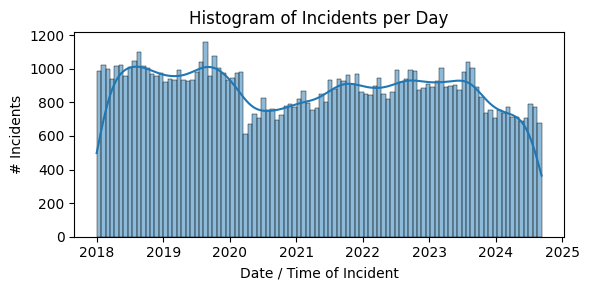

In [163]:
plt.figure(figsize=(6, 3))
sns.histplot(data=current_clean_data, x=current_clean_data.index, bins=100, kde=True)
# sns.histplot(data=current_clean_data, x=current_clean_data.index, discrete=True, kde=True)

plt.xlabel('Date / Time of Incident')
plt.ylabel('# Incidents')
plt.title('Histogram of Incidents per Day')

plt.tight_layout()
plt.savefig('../images/incidents_per_day.png')
plt.show()

#### Inspect: Incidents per Year

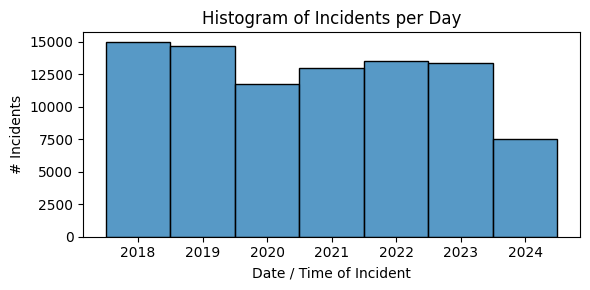

In [171]:
plt.figure(figsize=(6, 3))
# sns.histplot(data=current_clean_data, x='incident_year', kde=True)
sns.histplot(data=current_clean_data, x='incident_year', discrete=True)

plt.xlabel('Date / Time of Incident')
plt.ylabel('# Incidents')
plt.title('Histogram of Incidents per Day')

plt.tight_layout()
plt.savefig('../images/incidents_per_year.png')
plt.show()

#### Inspect: Incidents by Day of Week

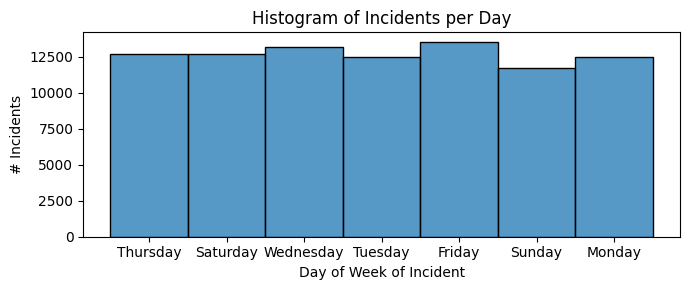

In [194]:
plt.figure(figsize=(7, 3))
# sns.histplot(data=current_clean_data, x='incident_year', kde=True)
sns.histplot(data=current_clean_data, x='incident_day_of_week')#, discreet=False)

plt.xlabel('Day of Week of Incident')
plt.ylabel('# Incidents')
plt.title('Histogram of Incidents per Day')

plt.tight_layout()
plt.savefig('../images/incidents_per_DoW.png')
plt.show()

In [173]:
current_clean_data.columns

Index(['incident_date', 'incident_time', 'incident_year',
       'incident_day_of_week', 'incident_category', 'incident_subcategory',
       'incident_description', 'resolution', 'police_district',
       'analysis_neighborhood', 'supervisor_district',
       'supervisor_district_2012', 'neighborhoods',
       'current_supervisor_districts', 'current_police_districts', 'date'],
      dtype='object')

In [21]:
data = current_clean_data

In [22]:
data.head(2)

,Unnamed: 0,incident_datetime,incident_date,incident_time,incident_year,incident_day_of_week,report_type_code,report_type_description,filed_online,incident_code,...,intersection,cnn,police_district,analysis_neighborhood,supervisor_district,supervisor_district_2012,neighborhoods,current_supervisor_districts,current_police_districts,date
datetime,,,,,,,,,,,,,,,,,,,,,
2022-02-10 07:59:00,308322,2022/02/10 07:59:00 AM,2022/02/10,07:59,2022,Thursday,VS,Vehicle Supplement,NaN,7041,...,SAN BENITO WAY \ OCEAN AVE,22771000.0,Ingleside,West of Twin Peaks,7.0,7.0,67.0,8.0,10.0,2022-02-10
2022-11-17 23:30:00,371699,2022/11/17 11:30:00 PM,2022/11/17,23:30,2022,Thursday,II,Initial,NaN,75000,...,SYCAMORE ST \ VALENCIA ST,24172000.0,Mission,Mission,9.0,8.0,53.0,5.0,3.0,2022-11-17


In [24]:
data.resolution.value_counts(normalize=True)

resolution
Open or Active          0.803645
Cite or Arrest Adult    0.188656
Unfounded               0.005005
Exceptional Adult       0.002694
Name: proportion, dtype: float64

In [25]:
temp_copy = data.copy()

temp_copy.columns

Index(['Unnamed: 0', 'incident_datetime', 'incident_date', 'incident_time',
       'incident_year', 'incident_day_of_week', 'report_type_code',
       'report_type_description', 'filed_online', 'incident_code',
       'incident_category', 'incident_subcategory', 'incident_description',
       'resolution', 'intersection', 'cnn', 'police_district',
       'analysis_neighborhood', 'supervisor_district',
       'supervisor_district_2012', 'neighborhoods',
       'current_supervisor_districts', 'current_police_districts', 'date'],
      dtype='object')

In [26]:
temp_copy.columns

Index(['Unnamed: 0', 'incident_datetime', 'incident_date', 'incident_time',
       'incident_year', 'incident_day_of_week', 'report_type_code',
       'report_type_description', 'filed_online', 'incident_code',
       'incident_category', 'incident_subcategory', 'incident_description',
       'resolution', 'intersection', 'cnn', 'police_district',
       'analysis_neighborhood', 'supervisor_district',
       'supervisor_district_2012', 'neighborhoods',
       'current_supervisor_districts', 'current_police_districts', 'date'],
      dtype='object')

In [27]:
temp = temp_copy.head(1000)

In [28]:
temp.columns

Index(['Unnamed: 0', 'incident_datetime', 'incident_date', 'incident_time',
       'incident_year', 'incident_day_of_week', 'report_type_code',
       'report_type_description', 'filed_online', 'incident_code',
       'incident_category', 'incident_subcategory', 'incident_description',
       'resolution', 'intersection', 'cnn', 'police_district',
       'analysis_neighborhood', 'supervisor_district',
       'supervisor_district_2012', 'neighborhoods',
       'current_supervisor_districts', 'current_police_districts', 'date'],
      dtype='object')

In [29]:
# graph_utils.graph_features(temp, 13, 2, figsize=(10, 15))

In [30]:
# feature_df = temp[['incident_datetime', 'incident_date', 'incident_time', 'incident_year', 'incident_day_of_week']]
# graph_features(feature_df, 3, 2)

In [31]:
temp_copy.columns

Index(['Unnamed: 0', 'incident_datetime', 'incident_date', 'incident_time',
       'incident_year', 'incident_day_of_week', 'report_type_code',
       'report_type_description', 'filed_online', 'incident_code',
       'incident_category', 'incident_subcategory', 'incident_description',
       'resolution', 'intersection', 'cnn', 'police_district',
       'analysis_neighborhood', 'supervisor_district',
       'supervisor_district_2012', 'neighborhoods',
       'current_supervisor_districts', 'current_police_districts', 'date'],
      dtype='object')

In [32]:
temp_copy.incident_description.head(5)

datetime
2022-02-10 07:59:00                Vehicle, Recovered, Auto
2022-11-17 23:30:00                            Found Person
2023-12-23 22:50:00                         Found  Property
2018-09-05 13:20:00    Methamphetamine, Possession For Sale
2022-01-22 10:28:00                Vehicle, Recovered, Auto
Name: incident_description, dtype: object

In [33]:
temp_copy.shape

(88717, 24)

In [34]:
temp_copy.incident_description.value_counts()

incident_description
Theft, From Locked Vehicle, >$950            10659
Malicious Mischief, Vandalism to Property     2894
Battery                                       2693
Lost Property                                 2667
Vehicle, Stolen, Auto                         2650
                                             ...  
Homicide, Drive-by                               1
Assault, Mayhem, W/ Gun                          1
Throwing Injurious Substance on Highway          1
Loitering near ATM                               1
Assault, Att. Mayhem, W/ Force                   1
Name: count, Length: 657, dtype: int64

In [35]:
temp_copy.incident_category.value_counts()

incident_category
Larceny Theft                                   26472
Other Miscellaneous                              6039
Malicious Mischief                               5935
Assault                                          5512
Non-Criminal                                     5207
Motor Vehicle Theft                              5009
Burglary                                         4929
Recovered Vehicle                                3534
Fraud                                            2857
Warrant                                          2700
Lost Property                                    2667
Drug Offense                                     2256
Robbery                                          1945
Missing Person                                   1887
Suspicious Occ                                   1811
Disorderly Conduct                               1523
Offences Against The Family And Children         1201
Miscellaneous Investigation                      1032
Traffic Vi